In [34]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import hddm
import pandas as pd
import matplotlib.pyplot as plt
import os
path = '/home/krista/Dropbox/volatileValues/spydr_scripts/'

In [35]:
os.chdir(path)
os.getcwd()

'/home/krista/Dropbox/volatileValues/spydr_scripts'

In [36]:
#flip v to + when correct 
data = hddm.load_csv('./test_recovery.csv')
data.columns = data.columns.str.strip()
data.head(4)
data.tail()

,rt,response,cp,gen_drift,gen_bound,subj_idx,cond
119995,0.202,0,0.0,-1.000000,0.606754,49,hv
119996,0.282,0,0.0,-0.627434,0.589422,49,hv
119997,0.700,1,0.0,0.079211,0.583432,49,hv
119998,0.700,0,0.0,0.934657,1.115931,49,hv
119999,0.432,0,0.0,1.000000,0.631802,49,hv


In [38]:
cutoff =  .5
data = data[data.rt<cutoff]
data.reset_index(drop=True, inplace=True)

In [39]:
data.describe()

,rt,response,cp,gen_drift,gen_bound,subj_idx
count,87869.000000,87869.000000,87869.000000,87869.000000,87869.000000,87869.000000
mean,0.300636,0.605060,0.044623,-0.058709,0.714933,24.395714
std,0.086861,0.488841,0.206476,0.968031,0.368717,14.455547
min,0.002000,0.000000,0.000000,-1.000000,0.216887,0.000000
25%,0.232000,0.000000,0.000000,-1.000000,0.566200,12.000000
50%,0.292000,1.000000,0.000000,-0.686182,0.600429,24.000000
75%,0.362000,1.000000,0.000000,1.000000,0.665698,37.000000
max,0.492000,1.000000,1.000000,1.000000,3.499841,49.000000


In [40]:
#check if neg. values are included 
min(data.gen_drift), max(data.gen_drift)

(-1.0, 1.0)

In [41]:
data[data.cond == "lc"].gen_drift.mean(), data[data.cond == "hc"].gen_drift.mean()

(-0.030905654184563106, -0.05377904136297975)

In [42]:
data[data.cond == "lv"].gen_drift.mean(), data[data.cond == "hv"].gen_drift.mean()

(-0.029176184612911736, -0.13278516221275646)

In [43]:
data[data.cond == "lc"].gen_bound.mean(), data[data.cond == "hc"].gen_bound.mean()

(0.68130517402226298, 0.72507539947459942)

In [44]:
data[data.cond == "lv"].gen_bound.mean(), data[data.cond == "hv"].gen_bound.mean()

(0.6620571184294316, 0.80787424250737228)

In [17]:
data = hddm.utils.flip_errors(data)

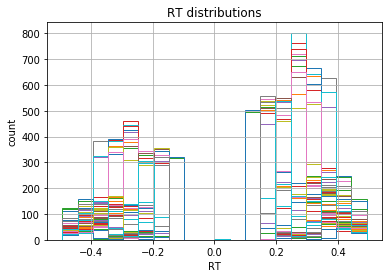

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


In [19]:
comb_stim = hddm.HDDM(data, bias=True, depends_on={'v':'cond', 'a':'cond'},
                        include=['v', 't', 'a','z'])
comb_stim.find_starting_values()
comb_stim.sample(1000, burn=20)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 653.1 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages

In [20]:
drift_stim = hddm.HDDM(data, bias=True, depends_on={'v':'cond'}, include=['v', 't', 'a','z']
                        )
drift_stim.find_starting_values()
drift_stim.sample(1000, burn=20)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 656.1 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages

In [21]:
bound_stim = hddm.HDDM(data, bias=True, depends_on={'a':'cond'},include=['v', 't', 'a','z']
                        )
bound_stim.find_starting_values()
bound_stim.sample(1000, burn=20)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 642.9 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages

In [23]:
stats = comb_stim.gen_stats()
stats[stats.index.isin(['v(hc)','v(lc)', 'v(hv)','v(lv)'])]

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v(hc),0.144385,0.0365102,0.0755242,0.119469,0.143829,0.16717,0.217249,0.00162402
v(hv),0.16919,0.0340551,0.102994,0.146938,0.168865,0.192526,0.236308,0.00157213
v(lc),1.0185,0.0345434,0.951723,0.994841,1.01753,1.04118,1.088,0.00172139
v(lv),0.627086,0.0361321,0.547623,0.603333,0.627772,0.651245,0.698777,0.00187707


In [24]:
stats[stats.index.isin(['a(hc)','a(lc)', 'a(hv)','a(lv)'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(hc),0.707931,0.026089,0.657312,0.690527,0.70851,0.725953,0.760627,0.000888994
a(hv),0.727374,0.0234155,0.679686,0.712374,0.727127,0.742807,0.771715,0.000887127
a(lc),0.690245,0.023764,0.641919,0.675528,0.690446,0.706183,0.734343,0.000827345
a(lv),0.655514,0.0246073,0.607464,0.638416,0.655701,0.672436,0.702366,0.000746108


Plotting a(hc)
Plotting a(hv)
Plotting a(lc)
Plotting a(lv)


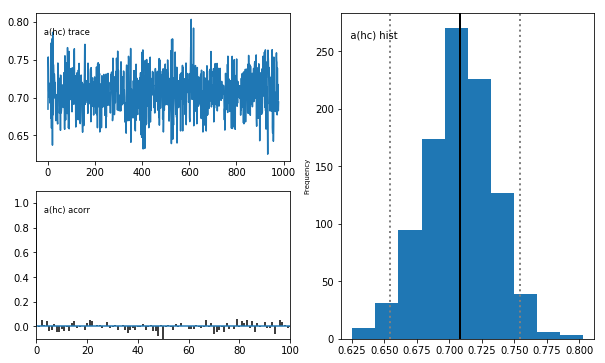

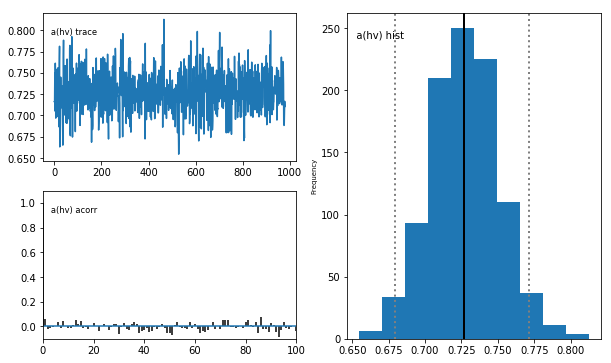

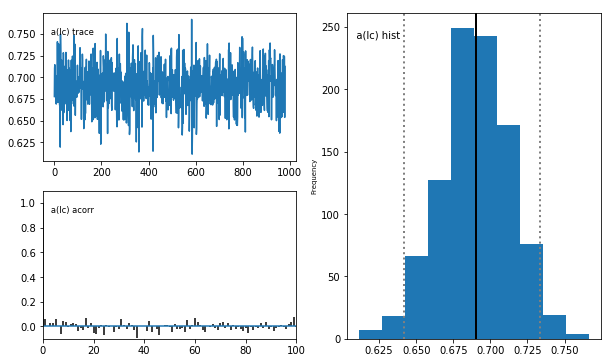

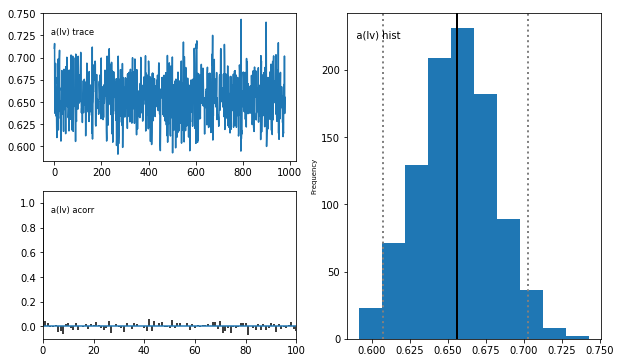

In [25]:
comb_stim.plot_posteriors('a', 'v')

In [26]:
v_lc, v_hc = comb_stim.nodes_db.node[['v(lc)', 'v(hc)']]
v_lv, v_hv = comb_stim.nodes_db.node[['v(lv)', 'v(hv)']]
a_lv, a_hv = comb_stim.nodes_db.node[['a(lv)', 'a(hv)']]
a_lc, a_hc = comb_stim.nodes_db.node[['a(lc)', 'a(hc)']]

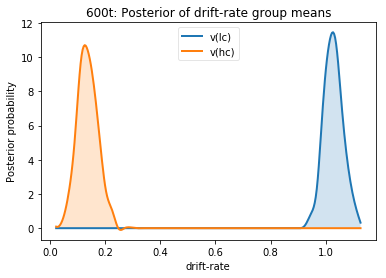

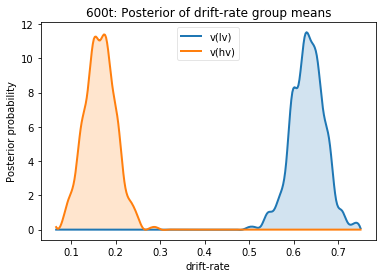

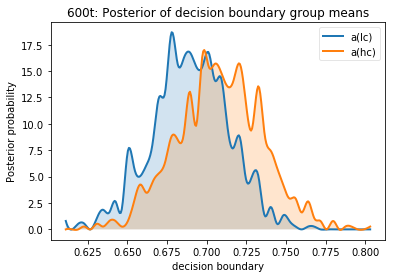

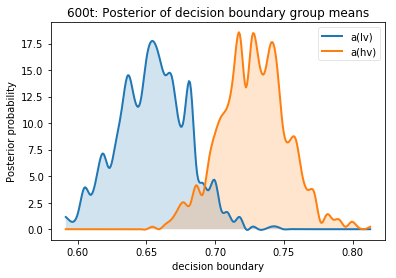

In [27]:
hddm.analyze.plot_posterior_nodes([v_lc, v_hc])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('600t: Posterior of drift-rate group means')
plt.savefig('600t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv, v_hv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('600t: Posterior of drift-rate group means')
plt.savefig('600t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([a_lc, a_hc])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('600t: Posterior of decision boundary group means')
plt.savefig('600t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([a_lv, a_hv])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('600t: Posterior of decision boundary group means')
plt.savefig('600t_bound_vol.pdf')



In [ ]:
# print("P(low_conflict_drift > high_conflict_drift) = ", (v_hc.trace() > v_lc.trace()).mean())
# print("P(low_conflict_bound > high_conflict_bound) = ", (a_hc.trace() > a_lc.trace()).mean())
# print("P(high_volatility_bound > low_volatility_bound) = ", (a_hv.trace() > a_lv.trace()).mean())
# print("P(high_volatility_drift > low_volatility_drift) = ", (v_hv.trace() > v_lv.trace()).mean())

In [ ]:
#for when i fit a null model 
# print "Lumped model DIC: %f" % model.dic
# print("Stimulus model DIC: %f" % m_stim.dic)

In [ ]:
#for when i fit alternative models

fig_path = '/Users/Krista/Dropbox/volatileValues/m_plots/'

print("combined model DIC: %f" % comb_stim.dic)
print("drift model DIC: %f" % drift_stim.dic)
print("bound model DIC: %f" % bound_stim.dic)

plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

names = [r'$a + v$',r'$a$',r'$v$']
dics = [comb_stim.dic,  bound_stim.dic, drift_stim.dic]
bars = plt.barh(names,dics, alpha=0.5)
plt.xlabel('DIC score')

bars[0].set_color('r')
bars[1].set_color('blue')
bars[2].set_color('forestgreen')

plt.axvline(comb_stim.dic, color='k', alpha=0.5, linestyle = '--')
# plt.savefig(fig_path+'600t_DIC.pdf')

In [ ]:
import numpy as np
dics = np.hstack(np.matrix((comb_stim.dic,  bound_stim.dic,  drift_stim.dic)))
# np.diff(dics)
header = ('combined_dic, a_dic, v_dic')
np.savetxt('600t_DICs.csv', dics, header = header, delimiter=',', comments='')

In [ ]:
 comb_stim.print_stats('./600t_comb_stats.csv')
 drift_stim.print_stats('./600t_drift_stats.csv')
 bound_stim.print_stats('./600t_bound_stats.csv')

In [ ]:
np.diff(dics)

In [28]:
gen_lc_v=data[data.cond == "lc"].gen_drift.mean()
gen_hc_v=data[data.cond == "hc"].gen_drift.mean()

In [32]:
gen_lc_v, v_lc

(0.97422642367602452, 1.0184987239808116)

In [30]:
a_hc = comb_stim.nodes_db.ix[['a(hc)'], 'mean'][0]
a_lc = comb_stim.nodes_db.ix[['a(lc)'], 'mean'][0]
a_hv = comb_stim.nodes_db.ix[['a(hv)'], 'mean'][0]
a_lv = comb_stim.nodes_db.ix[['a(lv)'], 'mean'][0]

In [31]:
v_hc = comb_stim.nodes_db.ix[['v(hc)'], 'mean'][0]
v_lc = comb_stim.nodes_db.ix[['v(lc)'], 'mean'][0]
v_hv = comb_stim.nodes_db.ix[['v(hv)'], 'mean'][0]
v_lv = comb_stim.nodes_db.ix[['v(lv)'], 'mean'][0]

In [ ]:
v_hc

In [ ]:
v_lc